In [1]:
import os
os.chdir('mmdetection')

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [5]:
# 日志文件路径
log_path = '/home/featurize/work/mmdetection/work_dirs/faster_r_cnn_dog_hip/20240711_142905/vis_data/scalars.json'

# log_path = 'work_dirs/rtmdet_tiny_triangle/20230511_234855/vis_data/scalars.json'

In [6]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [7]:
len(json_list)

2110

In [8]:

eval(json_list[4])

{'lr': 0.00018016032064128258,
 'data_time': 0.059527349472045896,
 'loss': 1.485305953025818,
 'loss_rpn_cls': 0.6972035050392151,
 'loss_rpn_bbox': 0.12194069474935532,
 'loss_cls': 0.665883082151413,
 'acc': 97.36328125,
 'loss_bbox': 0.0002786697732517496,
 'time': 0.42598915100097656,
 'epoch': 1,
 'iter': 5,
 'memory': 2867,
 'step': 5}

In [9]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|██████████| 2110/2110 [00:03<00:00, 684.00it/s]


In [10]:
df_train

,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,time,epoch,iter,memory,step
0,0.00002,0.262432,1.697378,0.701608,0.227712,0.767754,31.152344,0.000304,0.723006,1.0,1.0,2596.0,1.0
1,0.00006,0.135454,1.649803,0.697973,0.142856,0.808705,18.652344,0.000270,0.538429,1.0,2.0,2867.0,2.0
2,0.00010,0.094653,1.581633,0.697108,0.113028,0.771234,47.949219,0.000264,0.475091,1.0,3.0,2791.0,3.0
3,0.00014,0.072201,1.538679,0.696716,0.115049,0.726649,76.660156,0.000265,0.444094,1.0,4.0,2867.0,4.0
4,0.00018,0.059527,1.485306,0.697204,0.121941,0.665883,97.363281,0.000279,0.425989,1.0,5.0,2867.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.00020,0.023901,0.061016,0.002227,0.011191,0.015791,98.925781,0.031807,0.370680,50.0,2096.0,2271.0,2096.0
2096,0.00020,0.023899,0.061244,0.002244,0.011173,0.015845,99.121094,0.031982,0.370673,50.0,2097.0,2791.0,2097.0
2097,0.00020,0.023920,0.061283,0.002259,0.011226,0.015854,99.414062,0.031944,0.370978,50.0,2098.0,2867.0,2098.0
2098,0.00020,0.023964,0.061176,0.002274,0.011292,0.015751,99.414062,0.031859,0.371837,50.0,2099.0,2791.0,2099.0


In [11]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,pascal_voc/mAP,pascal_voc/AP50,data_time,time,step
0,0.287,0.746,0.113,-1.0,0.195,0.319,0.745893,0.746,0.010224,0.144324,5.0
1,0.602,0.970,0.593,-1.0,0.523,0.612,0.997886,0.998,0.007280,0.142353,10.0
2,0.678,0.974,0.775,-1.0,0.716,0.678,0.997886,0.998,0.007798,0.144085,15.0
3,0.694,0.972,0.845,-1.0,0.649,0.704,0.998931,0.999,0.008337,0.145014,20.0
4,0.706,0.969,0.839,-1.0,0.669,0.712,0.996791,0.997,0.022800,0.157602,25.0
5,0.689,0.967,0.813,-1.0,0.709,0.692,0.993537,0.994,0.007363,0.140692,30.0
6,0.701,0.971,0.798,-1.0,0.704,0.705,0.997886,0.998,0.007361,0.141117,35.0
7,0.705,0.969,0.821,-1.0,0.717,0.709,0.996791,0.997,0.007327,0.142113,40.0
8,0.711,0.971,0.859,-1.0,0.746,0.710,0.995868,0.996,0.007892,0.141981,45.0
9,0.729,0.971,0.869,-1.0,0.761,0.729,1.000000,1.000,0.007290,0.144522,50.0


In [12]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [13]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls',
       'acc', 'loss_bbox', 'time', 'epoch', 'iter', 'memory', 'step'],
      dtype='object')

In [14]:
metrics = ['loss', 'loss_bbox', 'loss_cls', 'loss_rpn_cls', 'loss_rpn_bbox']

/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  
/env

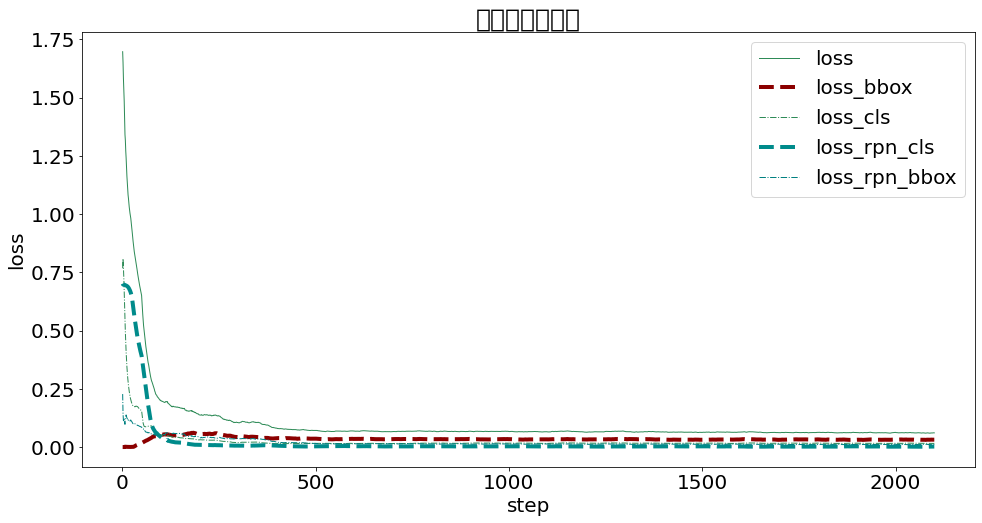

In [15]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [16]:
metrics = ['acc']

/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  
/env

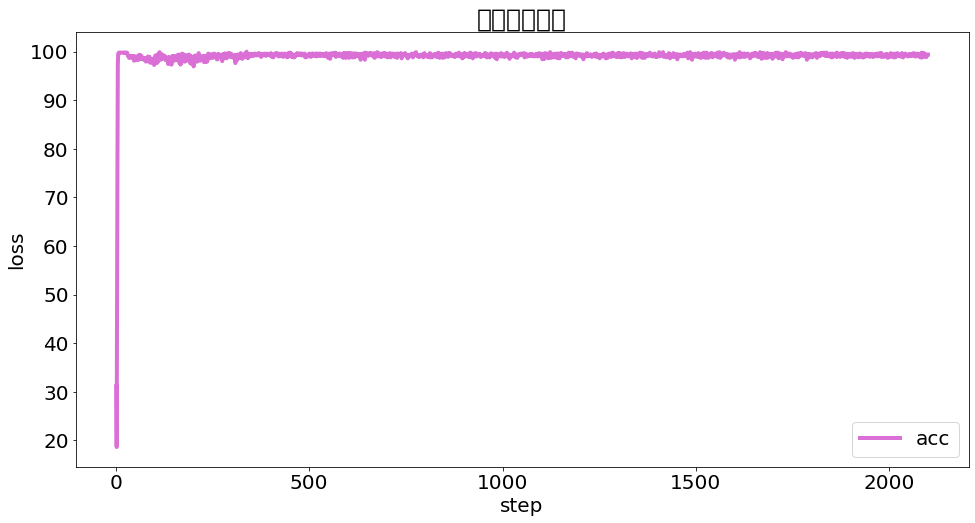

In [17]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()